[![View notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Jensen_and_Nugent_2017/Fig_3_and_Tab_4_upper_rows.ipynb) 
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Jensen_and_Nugent_2017/Fig_3_and_Tab_4_upper_rows.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Jensen_and_Nugent_2017/Fig_3_and_Tab_4_upper_rows.ipynb)

#### based on Fig. 3 and Table 4 (Modified Polluted) from [Jensen and Nugent (JAS 74)  "_Condensational Growth of Drops Formed on Giant Sea-Salt Aerosol Particles_"](https://doi.org/10.1175/JAS-D-15-0370.1)

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install "open-atmos-jupyter-utils"
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples>=2.45')

In [8]:
from IPython.display import display, HTML
from PySDM_examples.Jensen_and_Nugent_2017 import Settings, Simulation
from open_atmos_jupyter_utils import show_plot
from PySDM_examples.Jensen_and_Nugent_2017.plotting import figure, compute_table_values

settings = Settings(aerosol="modified polluted", cloud_type="Sc")
simulation = Simulation(settings)

In [3]:
output = simulation.run(steps_per_output_interval= 5)

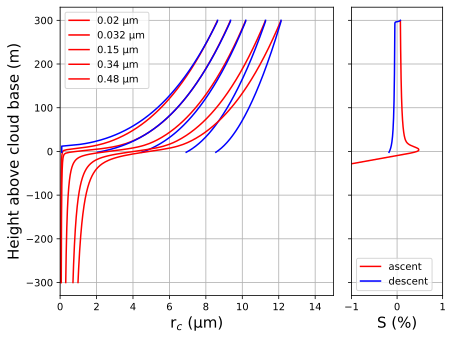

HTML(value="<a href='./Fig_3new.pdf' target='_blank'>./Fig_3new.pdf</a><br>")

In [4]:
masks = figure(
    output=output,
    settings=settings,
    simulation=simulation,
    plot_drops_with_dry_radii_um=(.02, .031, .152, .337, .5),
    xlim_r_um=(0, 15),
    xlim_S_percent=(-1, 1),
    return_masks=True
)

show_plot("Fig_3new.pdf")

In [5]:
table_values = compute_table_values(
    height_above_cb_m = (50, 100, 150, 200, 250, 300),
    height_cb_m = 900,
    products=output["products"],
    ascent_mask = masks["ascent"],
)

In [6]:
table_html = "<table>"

table_html += """

  <tr style="border-bottom:1px black solid">
    <th > Aerosols </th>
    <th > z (m) </th>
    <th>Mean cloud drop radius (μm)</th>
    <th>Drop spectral width (μm)</th>
    <th>Drop dispersion</th>
  </tr>  
"""
row_labels = {
    'ascent': 'Mod.polluted (Updraft)',
    'descent': 'Mod.polluted (Downdraft)'
}
for case, data in table_values.items():
    for var in data:
        table_html += f"""
            <tr{' style="border-top:1px black solid"'}>
            <td>{row_labels[case]}</td>
            <td>{var[0]}</td>
            <td>{var[1]}</td>
            <td>{var[2]}</td>
            <td>{var[3]}</td>
            </tr>   
        """   
table_html += "</table>"

In [7]:
display(HTML(table_html))

Aerosols,z (m),Mean cloud drop radius (μm),Drop spectral width (μm),Drop dispersion
Mod.polluted (Updraft),50,5.47,0.43,0.079
Mod.polluted (Updraft),100,6.78,0.39,0.058
Mod.polluted (Updraft),150,7.71,0.37,0.047
Mod.polluted (Updraft),200,8.45,0.35,0.041
Mod.polluted (Updraft),250,9.08,0.33,0.037
Mod.polluted (Updraft),300,9.64,0.32,0.034
Mod.polluted (Downdraft),300,9.64,0.32,0.034
Mod.polluted (Downdraft),250,9.11,0.34,0.038
Mod.polluted (Downdraft),200,8.48,0.37,0.044
Mod.polluted (Downdraft),150,7.74,0.41,0.053
